# Tables of Contents

Import libraries and data

#### Key Questions
7. Ordering Habits by Region
8. Ordering Habits by Age and Family Status
9. Habits Across Different Demographics
10. Ordering Habits of Different Customer Profiles

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Importing data

path = r'C:\Users\nodnarb\Documents\IC Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))

In [5]:
# Preview of columns

pd.set_option('display.max_columns', None)

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_times,max_orders,loyalty_flag,average_spending,spending_flag,median_days_of_prior_order,frequency_flag,gender,state,date_joined,n_dependants,fam_status,income,age_group,region,income_bracket,dependents_flag,department,_merge,customer_activity,customer_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,beverages,both,Normal activity,"married, middle aged adult"
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,dairy eggs,both,Normal activity,"married, middle aged adult"
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,snacks,both,Normal activity,"married, middle aged adult"
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,snacks,both,Normal activity,"married, middle aged adult"
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,2/17/2019,3,married,40423,middle aged adult,south,lower class,has dependents,household,both,Normal activity,"married, middle aged adult"


#### 7. Is there a connection between age and family status in terms of ordering habits?

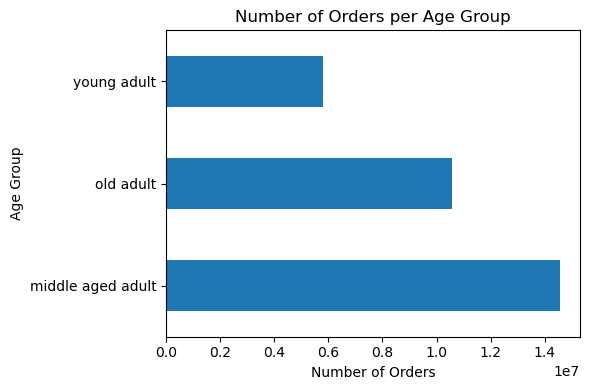

In [5]:
# Comparing age and total orders

# Plotting bar chart
age_order = df['age_group'].value_counts().plot.barh(figsize = (6,4))

plt.title('Number of Orders per Age Group')
plt.xlabel('Number of Orders')
plt.ylabel('Age Group')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '13_order_age.png'))

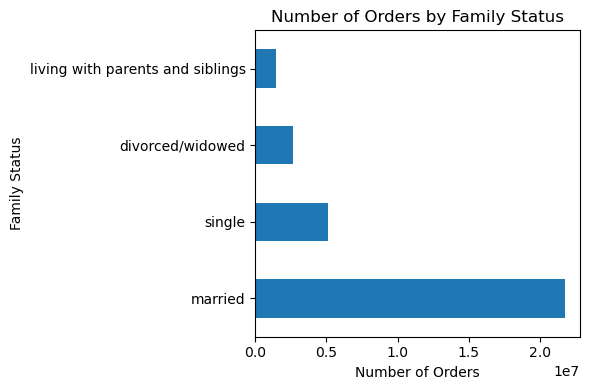

In [6]:
# Comparing family status and total orders

# Plotting bar chart

status_order = df['fam_status'].value_counts().plot.barh( figsize = (6,4))

plt.title('Number of Orders by Family Status')
plt.xlabel('Number of Orders')
plt.ylabel('Family Status')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '14_order_status.png'))

#### 8. What different classifcations does the demographic information suggest?


In [8]:
# Most popular departments across age groups

department_grouping = pd.crosstab(df['department'], df['age_group'])

print(department_grouping)

age_group        middle aged adult  old adult  young adult
department                                                
alcohol                      69093      47596        27938
babies                      193896     138738        77758
bakery                      528024     382446       210358
beverages                  1210577     883669       477655
breakfast                   314984     227751       128115
bulk                         15613      11424         6414
canned goods                475457     344447       192170
dairy eggs                 2438392    1762512       976278
deli                        471966     343335       188533
dry goods pasta             386147     280102       155887
frozen                      994551     728963       398217
household                   328822     240635       130400
international               120713      86448        48830
meat seafood                315645     232752       126384
missing                      30412      21787        125

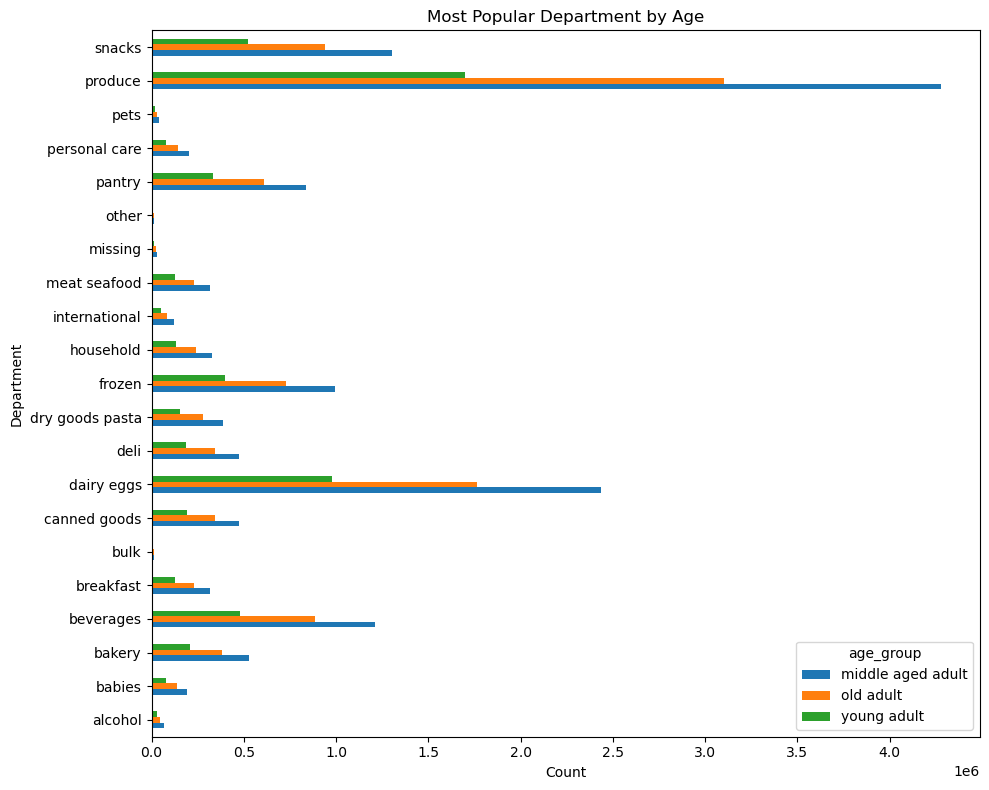

In [9]:
# Plotting chart 

depart_age = department_grouping.plot.barh(figsize = (10,8))

plt.title('Most Popular Department by Age')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '15_age_depart.png'))

In [11]:
# Most spending by income group

# Creating total spent aggregation
df['total_spent'] = df.groupby(['user_id'])['prices'].transform(np.sum)

C:\Users\nodnarb\AppData\Local\Temp\ipykernel_31032\29519317.py:4: FutureWarning: The provided callable <function sum at 0x0000021903EC5080> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_spent'] = df.groupby(['user_id'])['prices'].transform(np.sum)


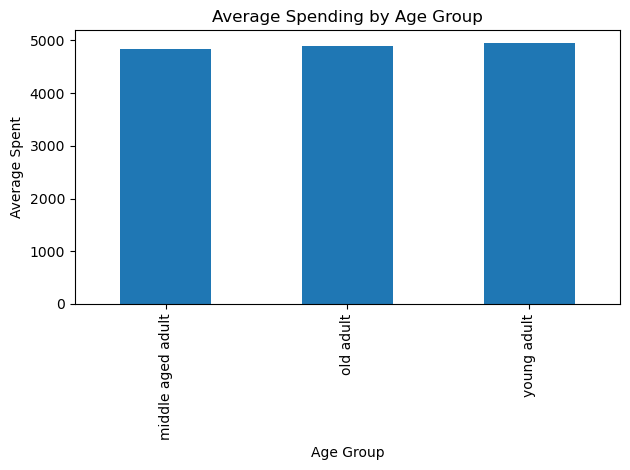

In [11]:
# Average total spent by age group

spend_age = df.groupby('age_group').agg({'total_spent': ['mean']}).plot.bar(legend = '')

plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spent')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '16_age_spent.png'))

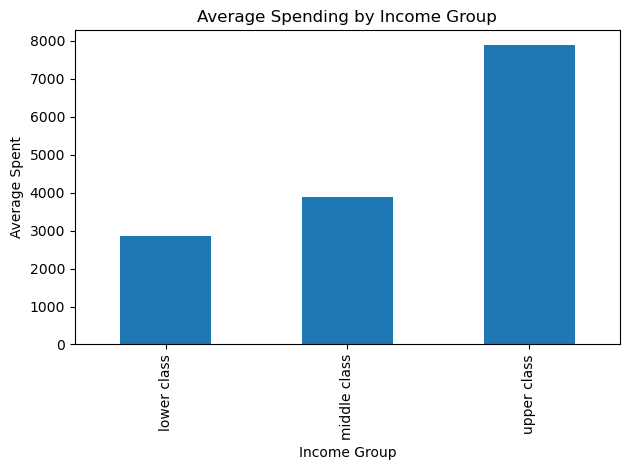

In [12]:
# Spending by income

spend_income = df.groupby('income_bracket').agg({'total_spent': ['mean']}).plot.bar(legend = '')

plt.title('Average Spending by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Spent')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '17_income_spent.png'))

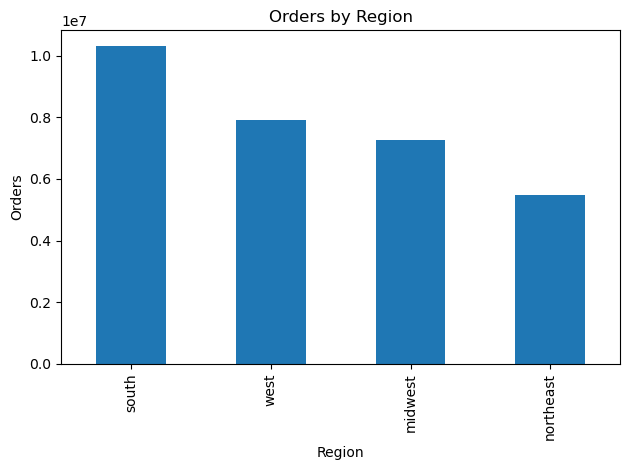

In [13]:
# Number of orders by region

orders_region = df['region'].value_counts().plot.bar()

plt.title('Orders by Region')
plt.xlabel('Region')
plt.ylabel('Orders')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '18_orders_region.png'))

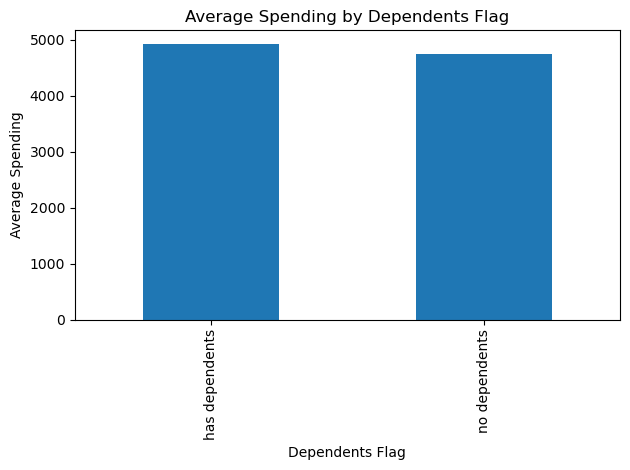

In [32]:
# Spending per dependent flag

spend_depend = df.groupby('dependents_flag').agg({'total_spent': ['mean']}).plot.bar(legend = '')

plt.title('Average Spending by Dependents Flag')
plt.xlabel('Dependents Flag')
plt.ylabel('Average Spending')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '19_spend_depend.png'))

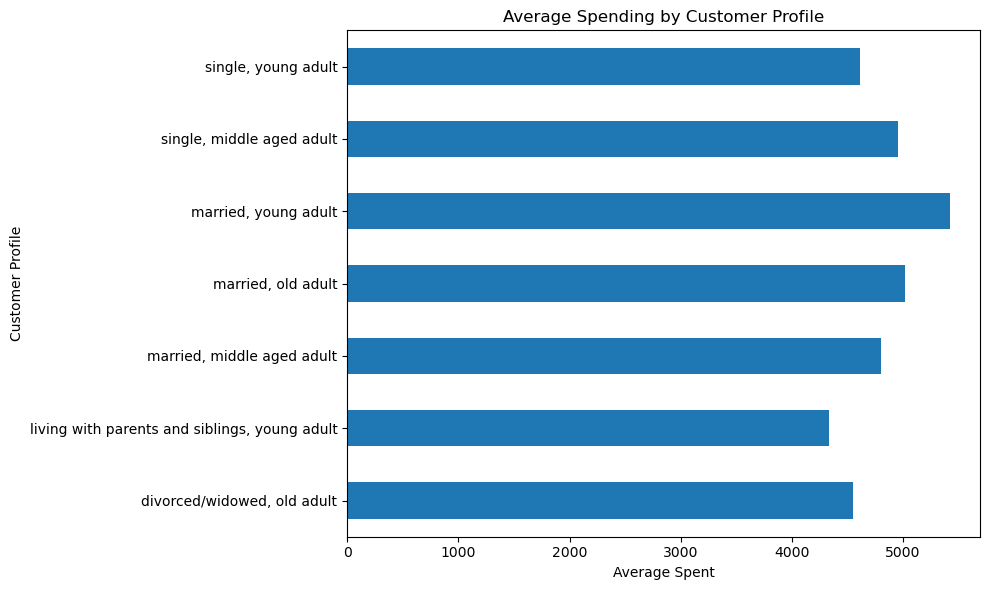

In [19]:
# Average total spent by customer profile

customer_spent = df.groupby('customer_profile').agg({'total_spent': ['mean']}).plot.barh(legend = '',
                                                                                        figsize = (10,6))

plt.title('Average Spending by Customer Profile')
plt.xlabel('Average Spent')
plt.ylabel('Customer Profile')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '20_cust_spent.png'))

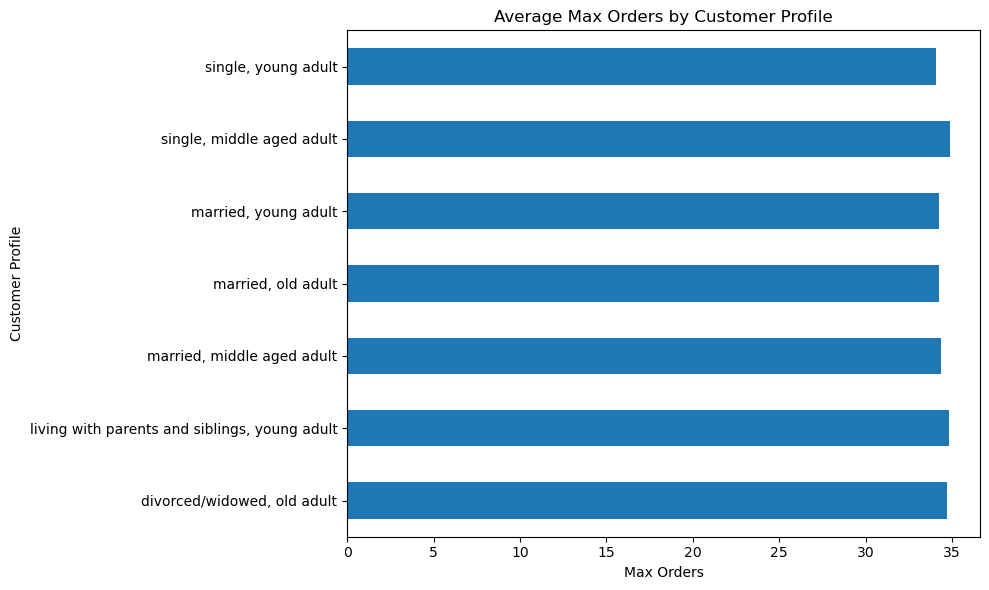

In [25]:
# Average max orders by customer profile

customer_ords = df.groupby('customer_profile').agg({'max_orders': ['mean']}).plot.barh(legend = '',
                                                                                        figsize = (10,6))

plt.title('Average Max Orders by Customer Profile')
plt.xlabel('Max Orders')
plt.ylabel('Customer Profile')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '22_cust_orders.png'))

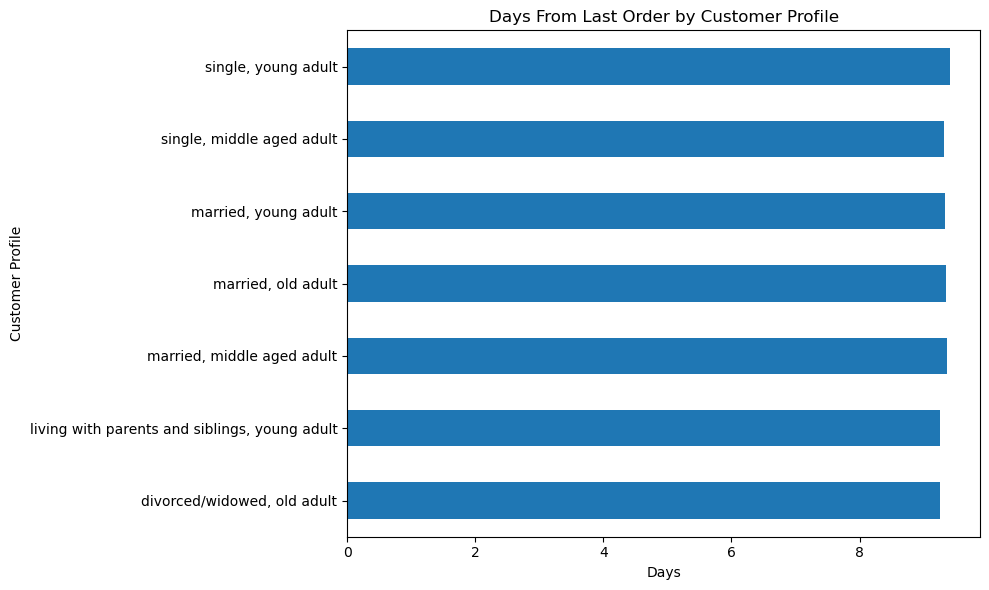

In [33]:
# Average median days of prior order by customer profile

customer_med = df.groupby('customer_profile').agg({'median_days_of_prior_order': ['mean']}).plot.barh(legend = '',
                                                                                        figsize = (10,6))

plt.title('Days From Last Order by Customer Profile')
plt.xlabel('Days')
plt.ylabel('Customer Profile')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '23_cust_med_ords.png'))

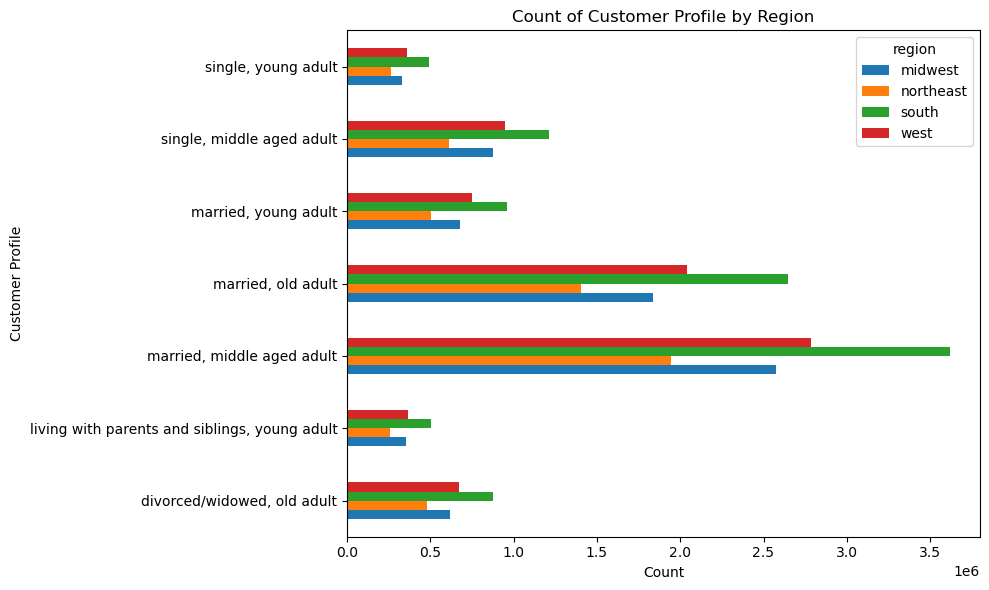

In [49]:
# Customer profiles by region

cust_region = pd.crosstab(df['customer_profile'], df['region']).plot.barh(figsize = (10,6))

plt.title('Count of Customer Profile by Region')
plt.xlabel('Count')
plt.ylabel('Customer Profile')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '24_cust_region.png'))

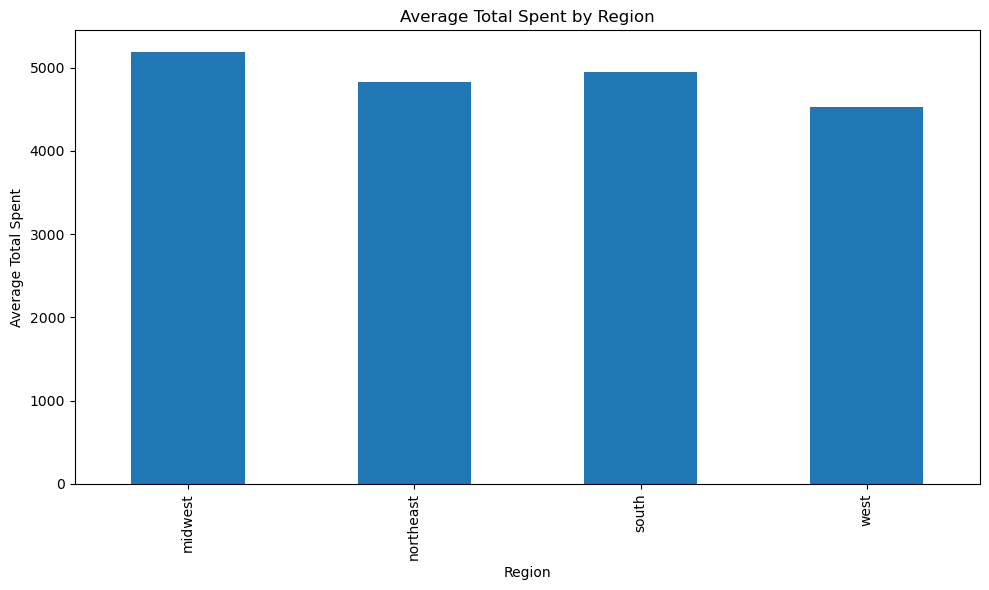

In [53]:
# Average total spent by region

region_spent = df.groupby('region').agg({'total_spent': ['mean']}).plot.bar(legend = '',
                                                                                        figsize = (10,6))

plt.title('Average Total Spent by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Spent')
plt.tight_layout()

# Exporting data
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '24_region_spent.png'))